<a href="https://colab.research.google.com/github/gautam1998/bit-predict/blob/main/notebooks/01_bit_predict_data_exploration_preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Data Exploration and Preperation***

This notebook explores the various steps involved in preparing the data set in a format usable for the models .

This mainly involves creating helper function for windowing the dataset

Check if the GPU is being utilized

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a9762950-8fcd-4cfa-4c4e-bd6f62c0fa17)


Link Drive to Colab

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#!cd '/content/gdrive/MyDrive'
#!mkdir 'BitPredict'
!cd '/content/gdrive/MyDrive/BitPredict'



##Download Data

Download the data from the mrdbourke/tensorflow-deep-learning repository



In [ ]:
!wget -P data/ https://github.com/gautam1998/bit-predict/tree/main/data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-08-09 10:15:53--  https://github.com/gautam1998/bit-predict/tree/main/data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/gautam1998/bit-predict/blob/main/data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv [following]
--2022-08-09 10:15:53--  https://github.com/gautam1998/bit-predict/blob/main/data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_     [ <=>                ]   1.08M  6.84MB/s    in 0.2s    

2022-08-09 10:15:54 (6.84 MB/s) - ‘data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [1127957]



##Data Exploration

Load the dataset in a dataframe indexed on the date

In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/BitPredict/data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices = df[["Closing Price (USD)"]].rename(columns = {"Closing Price (USD)":"prices"})
bitcoin_prices.head()

,prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Plot the price of bitcoin over time

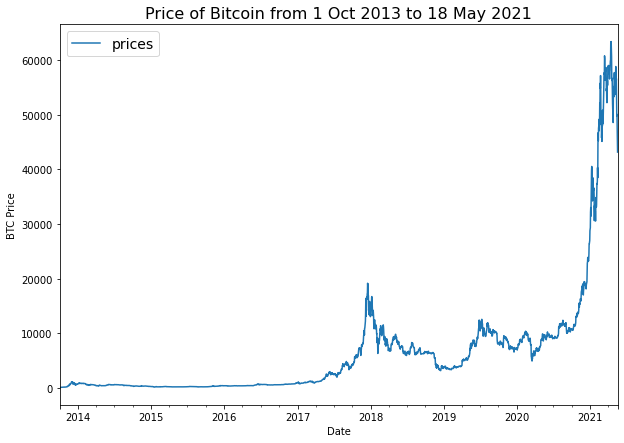

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

**Insight**, our data is not stationary

In [ ]:
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.prices.to_numpy()

##Split the Data into Train and Test Sets

Set the split size to **0.8**

In [ ]:
#Split into train and test sets for naive data

split_size = 0.8
train_size = int(split_size*(len(bitcoin_prices)))

X_train,y_train = timestamps[:train_size],prices[:train_size]
X_test,y_test = timestamps[train_size:],prices[train_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

The test data can be assumed to be the data in the future , we learn patterns from the historical data and make predictions for the future.

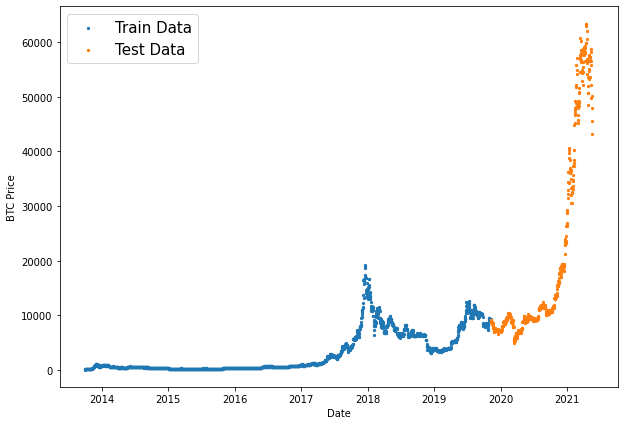

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Train Data')
plt.scatter(X_test,y_test,s=5,label='Test Data')
plt.legend(fontsize=15)
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

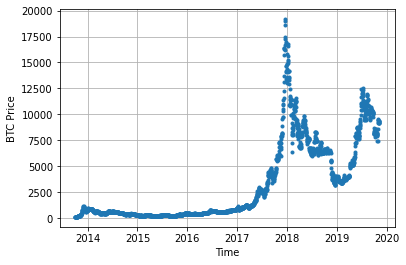

In [ ]:
plot_time_series(X_train,y_train)

##Windowing the data set

Window is the number of days in the past we are looking into to predict the future ie the horizon

eg window 7 and forecast 1
```
[1,2,3,4,5,6,7] -> [8]
```

In [ ]:
#lets first set window and horizon to 7 and 1

import tensorflow as tf

WINDOW = 7
HORIZON = 1

def get_labelled_window(data,HORIZON):

  return data[:,:-HORIZON],data[:,-HORIZON:]

get_labelled_window(tf.expand_dims((tf.range(8)+1),axis=0),1)

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
tf.expand_dims(tf.range(WINDOW+HORIZON),axis=0).numpy()


array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)

In [ ]:
import numpy as np

def make_windows(dataset,HORIZON=1,WINDOW=7):

  window_step = tf.expand_dims(tf.range(WINDOW+HORIZON),axis=0).numpy()

  window_indices = window_step + np.expand_dims(np.arange(len(dataset) - (WINDOW+HORIZON-1)),axis=0).T

  windowed_data = dataset[window_indices]

  windows,labels = get_labelled_window(windowed_data,HORIZON)

  return windows,labels

In [ ]:
full_windows,full_labels = make_windows(prices,1,7)
full_windows,full_labels

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
for i in range(3):
  print(full_windows[i],full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


In [ ]:
def split_into_train_and_test(windows,labels,split_size=0.2):

  train_size = int((1-split_size)*(len(windows)))

  train_windows = windows[:train_size]
  train_labels = labels[:train_size]

  test_windows = windows[train_size:]
  test_labels = labels[train_size:]

  return train_windows,train_labels,test_windows,test_labels

In [ ]:
train_windows,train_labels,test_windows,test_labels = split_into_train_and_test(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

Creating a callback function to save our best model

##Preparing Multivariate Data

In [ ]:
import numpy as np

# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,prices,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


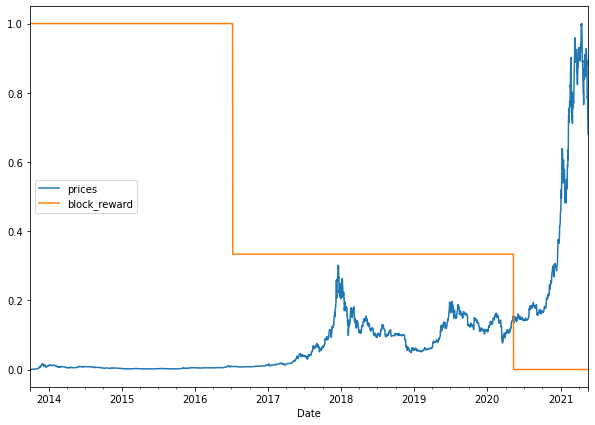

In [ ]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["prices", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
HORIZON = 1
WINDOW = 7

In [ ]:
bitcoin_prices_block_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW):
  bitcoin_prices_block_windowed[f"Price+{i+1}"] = bitcoin_prices_block_windowed["prices"].shift(periods=i+1)
bitcoin_prices_block_windowed.head(10)

,prices,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_block_windowed.dropna().drop("prices",axis=1).astype(np.float32)
y = bitcoin_prices_block_windowed.dropna()["prices"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: prices, dtype: float32

In [ ]:
split_size = int(0.8*(len(X)))

X_train,X_test = X[:split_size],X[split_size:]
y_train,y_test = y[:split_size],y[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

##N Beats Algorithm Data Preperation

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(self.n_neurons,activation="relu") for i in range(self.n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  def call(self,inputs):
      x = inputs
      for layer in self.hidden:
        x = layer(x)

      theta = self.theta_layer(x)

      backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
      return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"""
    backcast {backcast.numpy()}
    forecast {forecast.numpy()}
""")


    backcast [[-0.46348703  0.10944437 -0.43355325  0.936024   -0.35703513 -0.17927606
  -0.34048352]]
    forecast [[-0.43979004]]



In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW):
  bitcoin_prices_nbeats[f"Prices{i+1}"] = bitcoin_prices_nbeats["prices"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,prices,Prices1,Prices2,Prices3,Prices4,Prices5,Prices6,Prices7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("prices",axis=1)
y = bitcoin_prices_nbeats.dropna()["prices"]

X.head()

,Prices1,Prices2,Prices3,Prices4,Prices5,Prices6,Prices7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
y.head()

Date
2013-10-08    123.03300
2013-10-09    124.04900
2013-10-10    125.96116
2013-10-11    125.27966
2013-10-12    125.92750
Name: prices, dtype: float64

In [ ]:
split_size = int(0.8*len(X))

X_train = X[:split_size]
y_train = y[:split_size]

X_test = X[split_size:]
y_test = y[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
import tensorflow as tf

X_train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
X_test_dataset = tf.data.Dataset.from_tensor_slices(X_test)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)
y_test_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((X_train_dataset,y_train_dataset))
test_dataset = tf.data.Dataset.zip((X_test_dataset,y_test_dataset))

BATCH_SIZE = 1024 

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)